# Import needed libraries

In [ ]:
%matplotlib inline
import scipy.stats #stats
import pandas as pd # dataframe
import seaborn as sns # plotting
sns.set(style="ticks")

# List of distributions to test

In [20]:
dists = ['uniform', 'norm', 'lognorm', 'expon', 'beta',
         'powerlaw', 'bradford', 'burr', 'fisk', 'cauchy', 'halfcauchy',
         'foldcauchy', 'gamma', 'gengamma', 'loggamma',
         'alpha', 'anglit', 'arcsine', 'betaprime', 'dgamma',
         'exponnorm', 'exponweib', 'exponpow', 'frechet_l', 'frechet_r',
         'gilbrat', 'f', 'ncf', 'chi2', 'chi', 'nakagami', 'genpareto',
         'genextreme', 'genhalflogistic', 'pareto', 'lomax', 'halfnorm',
         'halflogistic', 'fatiguelife', 'foldnorm', 'ncx2', 't', 'nct',
         'weibull_min', 'weibull_max', 'dweibull', 'maxwell', 'rayleigh',
         'genlogistic', 'logistic', 'gumbel_l', 'gumbel_r', 'gompertz',
         'hypsecant', 'laplace', 'reciprocal', 'trapz', 'triang', 'tukeylambda',
         'vonmises', 'vonmises_line', 'pearson3', 'gennorm', 'halfgennorm',
         'rice', 'kappa4', 'kappa3', 'truncnorm']

# Load the cytokines dataset

In [34]:
cytokines = pd.read_csv("../data/Nelly_cytokine_data_cast.csv", header=0, sep=",")

In [35]:
cytokines.drop(['Unnamed: 0','Site', 'Sample', 'Group', 'SEX', 'GEST_AGE', 'DELIVERY', 'MOM_AGE'], axis = 1, inplace = True, errors = 'ignore')

In [36]:
cytokines.head()

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
0,0.00,0.00,407.55,34.01,0.00,1182.39,52,12854.94,25460.34,198.49,...,2.29,34.16,0,24.64,33.78,60.65,4013.29,55.22,38.90,29.63
1,0.00,164.65,190.30,294.21,0.00,4854.15,399,15484.07,10110.55,5332.88,...,2.29,34.16,0,24.64,33.78,76.21,3984.62,94.92,38.90,29.63
2,4.36,9.95,25.01,25.50,0.00,918.03,158,4153.73,6037.95,602.40,...,2.29,34.16,0,24.64,33.78,64.53,4070.76,1.19,38.90,29.63
3,0.00,0.00,48.22,243.46,0.69,1477.38,124,19789.61,11631.42,5421.80,...,6.69,12.26,0,41.15,34.50,221.81,4433.17,38.40,3158.78,24.06
4,0.00,305.57,130.76,254.47,0.74,4194.74,438,12298.07,11077.57,2834.02,...,8.80,12.26,0,41.15,34.50,225.47,4463.60,38.40,3158.78,23.83


In [87]:
cytokines_no_nas = cytokines.dropna() # some values have NaN so I replaced them with zeros

In [88]:
samples = list(cytokines) # Get all the cytokines labels in a list
#print samples
#sample = cytokines['LPS_IL-12p40']
results = pd.DataFrame(columns=('Sample', 'Distribution', 'Pvalue', 'D value'))

In [89]:
i = 0
for sample in samples:
    max = 0
    data = cytokines[sample]
    selected_dist = None
    prob = None
    distance = None
    for dist in dists:
        #print dist+"-----"+sample
        #fit our data set against every probability distribution
        parameters = eval("scipy.stats."+dist+".fit(data)");
        #Applying the Kolmogorov-Smirnof one sided test
        # The bigger the pvalue the more we reject the hypothesis that the data comes from the same distribution being tested
        D, p = scipy.stats.kstest(data, dist, args=parameters);
        #pretty-print the results
        #print dist.ljust(16) + ("p: "+str(p)).ljust(25)+"D: "+str(D);
        
        if p > max:
            selected_dist = dist
            prob = p
            distance = D
            max = p
    results.loc[i] = [sample, selected_dist, prob, distance]
    i+=1

In [91]:
results.head() # Checking how the results look like

,Sample,Distribution,Pvalue,D value
0,LPS_IFNa2,ncf,0.003463,0.290601
1,LPS_IFNg,vonmises_line,0.174641,0.179331
2,LPS_IL-10,pearson3,0.990420,0.073236
3,LPS_IL-12p40,gamma,0.944290,0.087778
4,LPS_IL-12p70,alpha,0.037405,0.229797


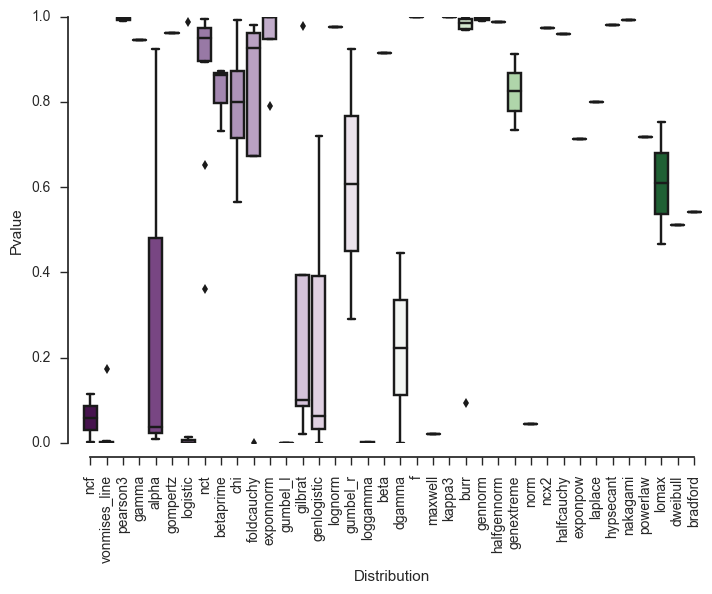

In [94]:
ax = sns.boxplot(x="Distribution", y="Pvalue", data=results, palette="PRGn")
sns.despine(offset=10, trim=True)

def set_tick_label_rotations(ax):
    for t in ax.get_xticklabels():
        t.set_rotation(90)

set_tick_label_rotations(ax)

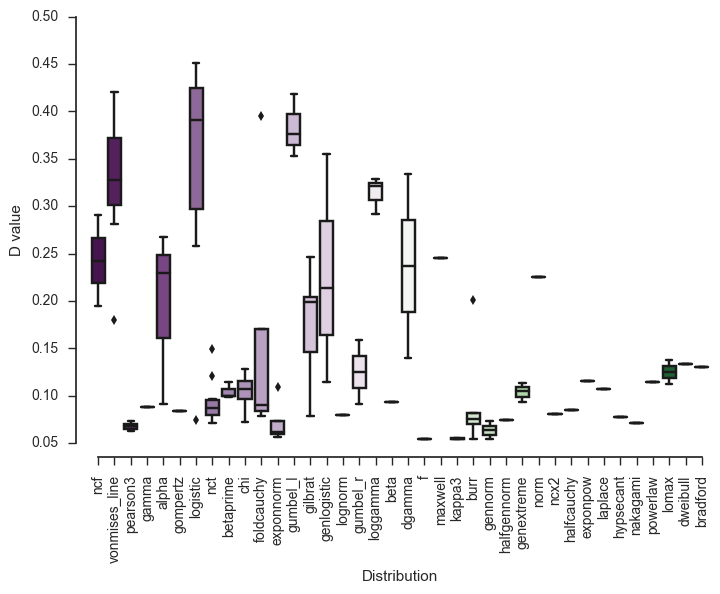

In [95]:
ax = sns.boxplot(x="Distribution", y="D value", data=results, palette="PRGn")
sns.despine(offset=10, trim=True)

def set_tick_label_rotations(ax):
    for t in ax.get_xticklabels():
        t.set_rotation(90)

set_tick_label_rotations(ax)

# Some references / reading

https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/ast119_w15/class-10  
https://www.johndcook.com/blog/distribution_chart/  
https://www.johndcook.com/blog/2010/08/11/what-distribution-does-my-data-have/